In [245]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

results_gov = pickle.load(open("results/50lords_0/results_gov.pkl", "rb"))
results_gov["Step"] = results_gov.index.astype(int)
results_no_gov = pickle.load(open("results/50lords_0/results_no_gov.pkl", "rb"))
results_no_gov["Step"] = results_no_gov.index.astype(int)
results_ad_valorem = pickle.load(open("results/50lords_0/results_ad_valorem.pkl", "rb"))
results_ad_valorem["Step"] = results_ad_valorem.index.astype(int)
results_both = pickle.load(open("results/50lords_0/results_both.pkl", "rb"))
results_both["Step"] = results_both.index.astype(int)

for _ in range(1,10):
    temp_gov = pickle.load(open(f"results/50lords_{_}/results_gov.pkl", "rb"))
    temp_gov["Step"] = temp_gov.index.astype(int)
    temp_no_gov = pickle.load(open(f"results/50lords_{_}/results_no_gov.pkl", "rb"))
    temp_no_gov["Step"] = temp_no_gov.index.astype(int)
    temp_ad_valorem = pickle.load(open(f"results/50lords_{_}/results_ad_valorem.pkl", "rb"))
    temp_ad_valorem["Step"] = temp_ad_valorem.index.astype(int)
    temp_both = pickle.load(open(f"results/50lords_{_}/results_both.pkl", "rb"))
    temp_both["Step"] = temp_both.index.astype(int)
    results_gov = pd.concat([results_gov, temp_gov], ignore_index=True)
    results_no_gov = pd.concat([results_no_gov, temp_no_gov], ignore_index=True)
    results_ad_valorem = pd.concat([results_ad_valorem, temp_ad_valorem], ignore_index=True)
    results_both = pd.concat([results_both, temp_both], ignore_index=True)

#drop rows with Step <= 2500
results_gov_fit = results_gov[results_gov["Step"] > 2500]
results_no_gov_fit = results_no_gov[results_no_gov["Step"] > 2500]
results_ad_valorem_fit = results_ad_valorem[results_ad_valorem["Step"] > 2500]
results_both_fit = results_both[results_both["Step"] > 2500]

In [228]:
def quadtaric_fit(df, column):
    sim_start = 2500
    batch_size = 12_500
    X_list = []
    Y_list = []
    for i in range(0, len(df), batch_size):
        steps = df["Step"][i+sim_start:i+batch_size].values
        values = df[column][i+sim_start:i+batch_size].values
        X_list.append(steps)
        Y_list.append(values)
    # Fit model on all data
    X = np.tile(X_list[0], len(X_list))
    Y = np.concatenate(Y_list)
    # Usuń NaN
    mask = ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, Y)
    # Predict for wspólny wektor stepów
    steps_poly = poly.transform(X_list[0].reshape(-1, 1))
    Y_pred = model.predict(steps_poly)
    return Y_pred


In [229]:
def plot_raw_data(collumn):
    batch_size = 12_500
    for i in range(0, len(results_gov), batch_size):
        plt.plot(results_gov["Step"][i:i+batch_size], results_gov[collumn][i:i+batch_size], color="blue", alpha=0.1)
        plt.plot(results_no_gov["Step"][i:i+batch_size], results_no_gov[collumn][i:i+batch_size], color="red", alpha=0.1)
        plt.plot(results_ad_valorem["Step"][i:i+batch_size], results_ad_valorem[collumn][i:i+batch_size], color="orange", alpha=0.1)
        plt.plot(results_both["Step"][i:i+batch_size], results_both[collumn][i:i+batch_size], color="green", alpha=0.1)

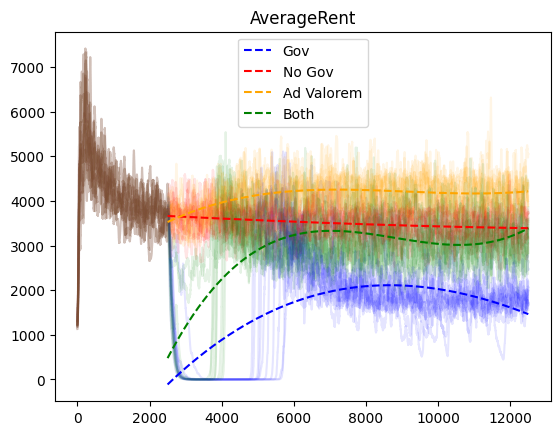

In [239]:
plot_raw_data("AverageRent")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "AverageRent"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "AverageRent"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "AverageRent"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "AverageRent"))), label="Both", color="green", linestyle="dashed")
plt.title("AverageRent")
plt.legend()

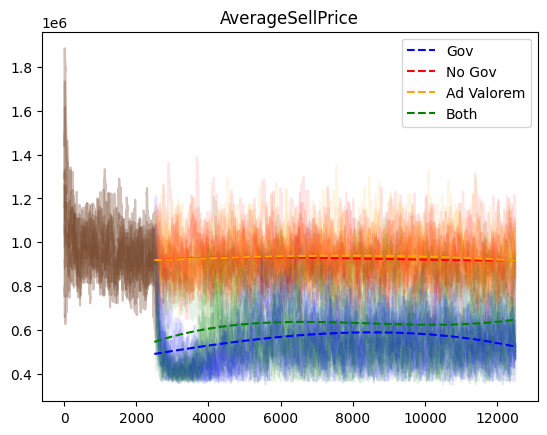

In [240]:
plot_raw_data("AverageSellPrice")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "AverageSellPrice"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "AverageSellPrice"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "AverageSellPrice"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "AverageSellPrice"))), label="Both", color="green", linestyle="dashed") 
plt.title("AverageSellPrice")
plt.legend()

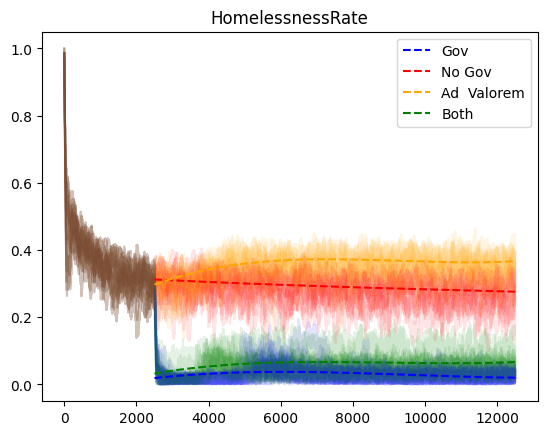

In [238]:
plot_raw_data("HomelessnessRate")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "HomelessnessRate"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "HomelessnessRate"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "HomelessnessRate"))), label="Ad  Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit   (results_both, "HomelessnessRate"))), label="Both", color="green", linestyle="dashed")
plt.title("HomelessnessRate")
plt.legend()
plt.show()

Text(0.5, 1.0, 'HouseOwnershipRate')

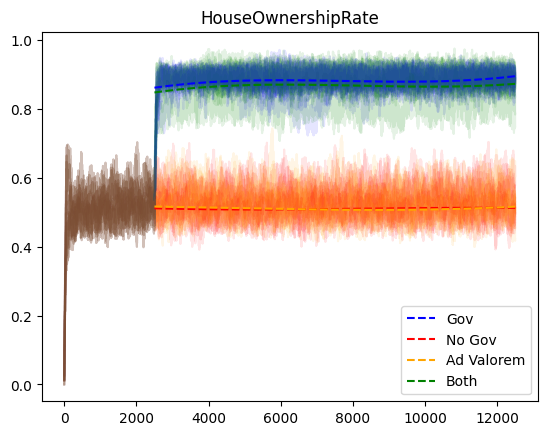

In [244]:
plot_raw_data("HouseOwnershipRate")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "HouseOwnershipRate"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "HouseOwnershipRate"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "HouseOwnershipRate"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "HouseOwnershipRate"))), label="Both", color="green", linestyle="dashed")
plt.legend()
plt.title("HouseOwnershipRate")

Text(0.5, 1.0, 'RentRate')

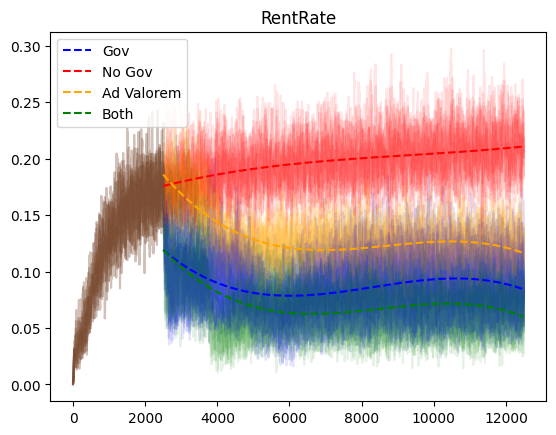

In [241]:
plot_raw_data("RentRate")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "RentRate"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "RentRate"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "RentRate"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "RentRate"))), label="Both", color="green", linestyle="dashed")
plt.legend()
plt.title("RentRate")

Text(0.5, 1.0, 'LandlordOwnedProperties')

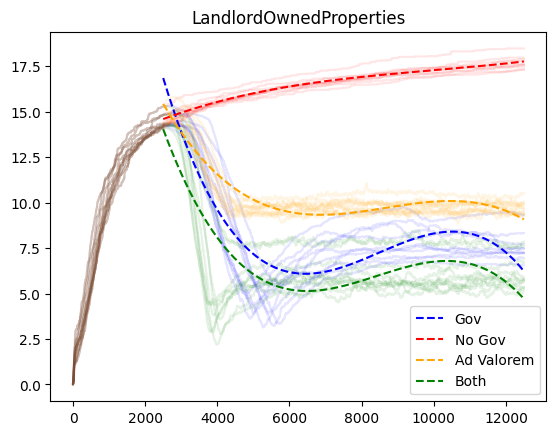

In [242]:
plot_raw_data("LandlordOwnedProperties")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "LandlordOwnedProperties"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "LandlordOwnedProperties"))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "LandlordOwnedProperties"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "LandlordOwnedProperties"))), label="Both", color="green", linestyle="dashed")
plt.legend()
plt.title("LandlordOwnedProperties")

Text(0.5, 1.0, 'AvgHappinesss')

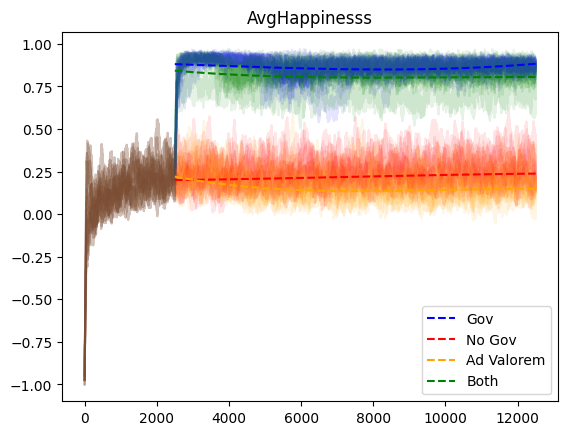

In [243]:
plot_raw_data("AverageHappiness")

plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_gov, "AverageHappiness"))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_no_gov, "AverageHappiness"))), label="No Gov", color="red",
            linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_ad_valorem, "AverageHappiness"))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(2500, np.nan), quadtaric_fit(results_both, "AverageHappiness"))), label="Both", color="green", linestyle="dashed")
plt.legend()
plt.title("AvgHappinesss")